In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

In [3]:
df = pd.read_csv('Bengaluru_Dataset.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df1 = df.drop(['area_type', 'availability','society','balcony'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2 =df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2.shape

(13246, 5)

In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split()[0]))
df2.head()

C:\Users\91911\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_folat(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df2[~df2['total_sqft'].apply(is_folat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def convert_sqrt_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_sqrt_to_num('2166')

2166.0

In [22]:
convert_sqrt_to_num('1215 - 1495')

1355.0

In [23]:
convert_sqrt_to_num('300Sq. Yards')

In [27]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqrt_to_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
##feature engineering

In [49]:
df4 = df3.copy()
df4['price_per_sqft']=  df4['price']*100000 / df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [50]:
len(df4.location.unique())

1304

In [51]:
df4.location = df4.location.apply(lambda x:x.strip())

location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                                      540
Sarjapur  Road                                  399
Electronic City                                 302
Kanakpura Road                                  273
Thanisandra                                     234
Yelahanka                                       213
Uttarahalli                                     186
Hebbal                                          177
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Hennur Road                                     152
Bannerghatta Road                               152
7th Phase JP Nagar                              149
Haralur Road                                    142
Electronic City Phase II                        132
Rajaji Nagar                                    107
Chandapura                                      100
Bellandur                                        96
KR Puram                                         91
Ele

In [52]:
len(location_stats[location_stats<=10])

1064

In [53]:
location_stats_less_then_10 = location_stats[location_stats<=10]
location_stats_less_then_10

location
BTM 1st Stage                                   10
Basapura                                        10
Ganga Nagar                                     10
1st Block Koramangala                           10
Dodsworth Layout                                10
Sadashiva Nagar                                 10
Kalkere                                         10
Dairy Circle                                    10
Naganathapura                                   10
Nagadevanahalli                                 10
Nagappa Reddy Layout                            10
Gunjur Palya                                    10
Yemlur                                           9
Peenya                                           9
Chennammana Kere                                 9
Medahalli                                        9
Volagerekallahalli                               9
4th Block Koramangala                            9
Kamakshipalya                                    9
Vishwanatha Nagenahall

In [54]:
len(df4.location.unique())

1293

In [55]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_then_10 else x)
len(df4.location.unique())

271

In [56]:
df4.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3268,other,2 BHK,1110.0,2.0,41.0,2,3693.693694
12439,Kundalahalli,4 Bedroom,1500.0,4.0,235.0,4,15666.666667
7332,Mysore Road,3 BHK,1500.0,3.0,74.0,3,4933.333333
8280,Frazer Town,4 BHK,3435.0,2.0,341.0,4,9927.219796
235,other,3 BHK,1500.0,2.0,65.0,3,4333.333333
1990,Jalahalli,2 BHK,1400.0,1.0,80.0,2,5714.285714
9637,Sarjapur Road,2 BHK,1242.0,2.0,75.0,2,6038.647343
3506,other,5 Bedroom,1200.0,5.0,185.0,5,15416.666667
9754,Kasavanhalli,2 BHK,1575.0,2.0,85.0,2,5396.825397
10419,Sarjapur Road,3 BHK,2275.0,4.0,182.0,3,8000.000000


In [57]:
### outliers 

In [58]:
 df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [59]:
df4.shape

(13246, 7)

In [60]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [62]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [63]:
def remove_pps_outliers(dataf):
    df_out = pd.DataFrame()
    for key,subdf in dataf.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10210, 7)

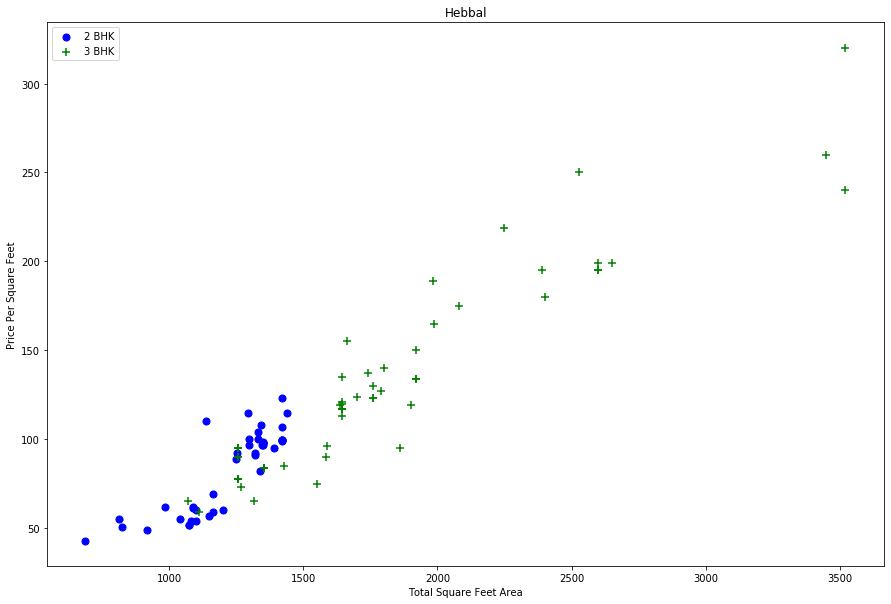

In [86]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]    
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Hebbal")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less then 2 bedroom apartment (with same square ft. area). What we will do is for a given location, we will do is for a given location, we will build a dictionary of stats per bhk,i.e**

    {
        '1' : {
            'mean' : 4000,
            'std' : 2000,
            'count' : 34
         },
        '2' : {
            'mean' : 4300,
            'std' : 2300,
            'count' : 22
         },
    }

**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft 1 BHK apartment...**

In [84]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(7314, 7)

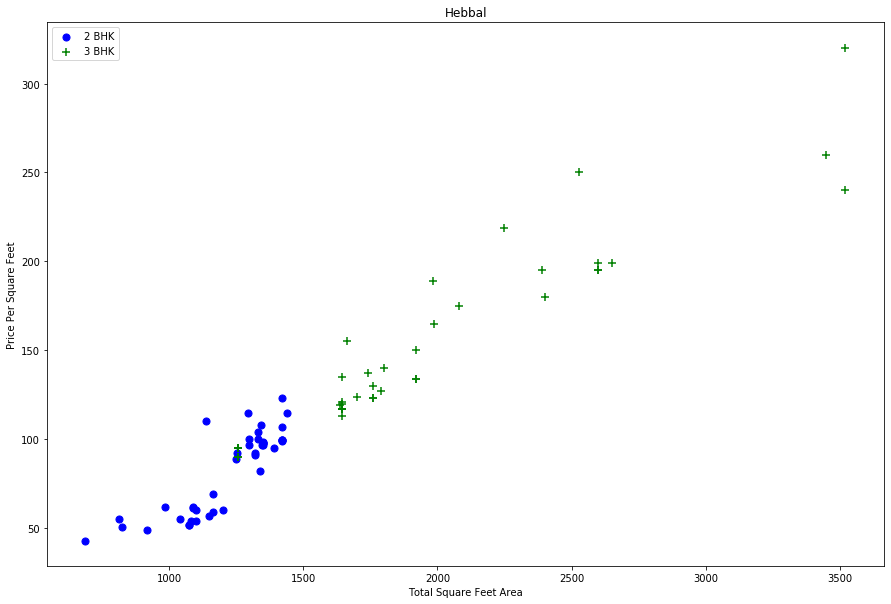

In [88]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

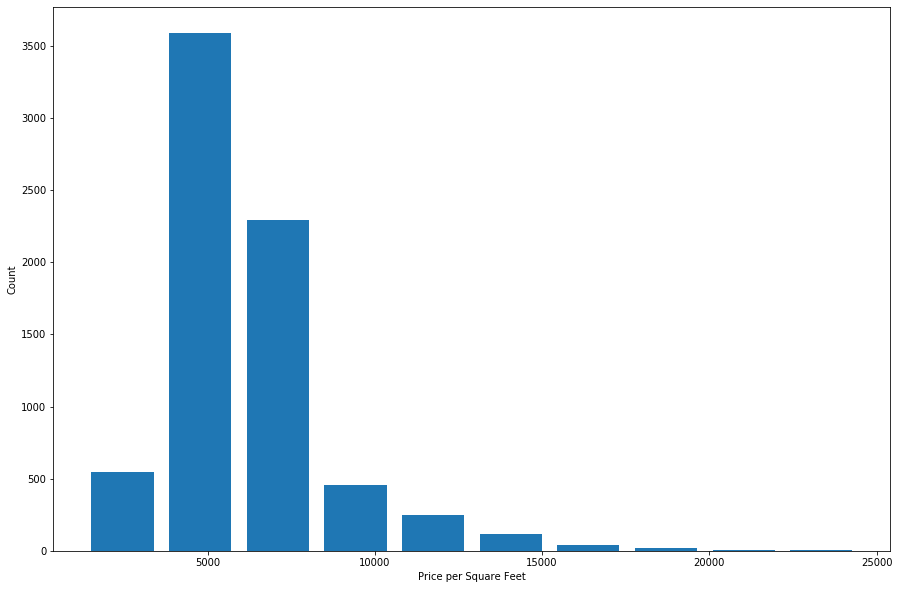

In [90]:
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

In [91]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [92]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5274,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8487,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8574,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9299,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9624,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

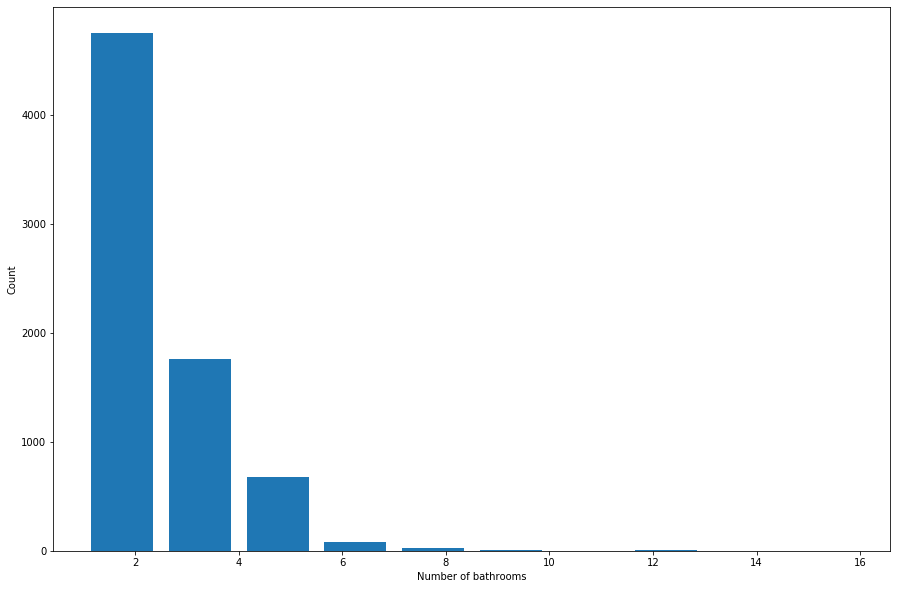

In [93]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [94]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5235,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6718,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8416,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [96]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7236, 7)

In [97]:
## model 

In [99]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [102]:
dummies = pd.get_dummies(df9.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,south
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df11.shape

(7236, 257)

In [106]:
X = df11.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8432086297932972

In [111]:
## K-fold cross 
from sklearn.model_selection import ShuffleSplit,cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([ 8.50101340e-01, -1.36609372e+14,  8.48294483e-01,  8.47434134e-01,
        8.84556588e-01])

In [132]:
# ## grid searchCV
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor

# def find_best_model_using_gridsearchcv(X,y):
#     algos = {
#         'linear_regression' : {
#             'model' : LinearRegression(),
#             'Params' : {
#                 'normalize' : [True, False]
#             }
#         },
#         'lasso' : {
#             'model' : Lasso(),
#             'Params' : {
#                 'alpha' : [1,2],
#                 'normalize' : ['random', 'cyclic']
#             }
#         },
#         'decision_tree' : {
#             'model' : DecisionTreeRegressor(),
#             'Params' : {
#                 'criterion' : ['mse','friedman_mse'],
#                 'splitter' : ['best','random']
#             }
#         },
#         'randomforestregressor' : {
#             'model' : RandomForestRegressor(),
#             'Params' : {
#                 'criterion' : ['mse','friedman_mse']
#             }
#         }    
#     }
#     score = []
#     cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
#     for algo_name, config in algos.items():
#         gs = GridSearchCV(config['model'], config['Params'], cv=cv, return_train_score=False)
#         gs.fit(X,y)
#         score.append({
#             'model':algo_name,
#             'best_score' : gs.best_score_,
#             'best_params' : gs.best_params_
#         })
#     return pd.DataFrame(score,columns=['model','best_score','best_params'])

In [133]:
# find_best_model_using_gridsearchcv(X,y)

In [134]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield', 'Whitefield,',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'south'],
      dtype='object', length=256)

In [135]:
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

5

In [136]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>=0:
        x[loc_index] = 1
    return model.predict([x])[0]

In [140]:
predict_price('1st Phase JP Nagar',1000,2,2)

84.17095863696842

In [148]:
predict_price('1st Phase JP Nagar',1000,3,3)

87.05222733086268

In [145]:
predict_price('Indira Nagar',1000,2,2)

189.74616858667883

In [146]:
predict_price('Indira Nagar',1000,3,3)

189.74616858667883

In [149]:
# model is done Now covert the pickle file

In [150]:
import pickle
with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(model,f)

In [152]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))